In [1]:
import pandas as pd
import json

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
with open('tinkoff_hh.txt', encoding='utf8') as data:
    file = data.readlines()

In [4]:
file

['{"index":{"_id":"0"}}\n',
 '{"vacancy":"Начинающий специалист по залоговому кредитованию","company":"Тинькофф","creation_date":"2019-01-15","region":"Москва","income":"от\xa055\xa0000\xa0руб.","experience":"не требуется","employment_type":"Полная занятость","duties":"- Звонить клиентам, которым банк одобрил кредит под залог;\\n- Согласовывать условия кредита;\\n- Консультировать клиентов по их вопросам;\\n- Назначать встречи с представителем банка.","requirements":null,"conditions":"- График работы 5\\/2 с плавающими выходными;\\n- Оклад + ежемесячная неограниченная премия;\\n- Место работы в шаговой доступности от м. Марьина Роща;\\n- Стипендия за обучение (в случае его прохождения и работы в штате более 2 месяцев);\\n- Скидка на посещение фитнес-клуба."}\n',
 '{"index":{"_id":"1"}}\n',
 '{"vacancy":"Начинающий специалист в банк","company":"Тинькофф","creation_date":"2019-01-15","region":"Москва","income":"от\xa050\xa0000\xa0руб.","experience":"не требуется","employment_type":"Полна

In [6]:
l = [json.loads(el) for el in file if 'index' not in el]
df = pd.DataFrame(l)
df.head(5)

,vacancy,company,creation_date,region,income,experience,employment_type,duties,requirements,conditions
0,Начинающий специалист по залоговому кредитованию,Тинькофф,2019-01-15,Москва,от 55 000 руб.,не требуется,Полная занятость,"- Звонить клиентам, которым банк одобрил креди...",None,- График работы 5/2 с плавающими выходными;\n-...
1,Начинающий специалист в банк,Тинькофф,2019-01-15,Москва,от 50 000 руб.,не требуется,Полная занятость,- Работать с действующими и потенциальными кли...,- Грамотная речь;\n- Уверенный пользователь ПК.,- Стабильную заработную плату: гарантированный...
2,Менеджер по работе с корпоративными клиентами ...,Тинькофф,2019-01-15,Москва,от 50 000 до 150 000 руб.,1–3 года,Полная занятость,- Самостоятельный поиск и активное привлечение...,"- Желание работать в современном, высококвалиф...",- Обучение у лучших тренеров и наставников бан...
3,Менеджер по привлечению юридических лиц,Тинькофф,2019-01-15,Коломна,от 80 000 руб.,не требуется,Полная занятость,- Поиск и привлечение юридических лиц;\n- Пров...,"- Активная жизненная позиция;\n- Мобильность, ...","- Работу в успешном, а главное, стабильном Бан..."
4,Менеджер по привлечению юридических лиц,Тинькофф,2019-01-15,Одинцово,от 80 000 руб.,не требуется,Полная занятость,- Поиск и привлечение юридических лиц;\n- Пров...,"- Активная жизненная позиция;\n- Мобильность, ...","- Работу в успешном, а главное, стабильном Бан..."


In [9]:
dfSalary = df[["vacancy","income","region"]][df["income"] != "не указан"].drop_duplicates()
dfSalary['vacancy'] = dfSalary['vacancy'].str.lower()
dfSalary['vacancy'].value_counts()

агент по доставке продуктов тинькофф                                   156
представитель тинькофф                                                 109
консультант по работе с клиентами                                       48
представитель тинькофф банка                                            47
специалист по развитию агентской сети                                   41
                                                                      ... 
консультант в офис                                                       1
менеджер страхования                                                     1
менеджер в отдел взыскания                                               1
специалист по привлечению юридических                                    1
менеджер по работе с корпоративными клиентами сектора прямых продаж      1
Name: vacancy, Length: 173, dtype: int64

In [10]:
def int_income(r):
    s = r['income'].split()
    return int(s[1])*1000


In [11]:
dff=dfSalary

In [12]:
dff['income'] = dff.apply(int_income, axis=1)
dff

,vacancy,income,region
0,начинающий специалист по залоговому кредитованию,55000,Москва
1,начинающий специалист в банк,50000,Москва
2,менеджер по работе с корпоративными клиентами ...,50000,Москва
3,менеджер по привлечению юридических лиц,80000,Коломна
4,менеджер по привлечению юридических лиц,80000,Одинцово
...,...,...,...
2675,агент по доставке продуктов тинькофф,45000,Губкинский
2676,представитель тинькофф,30000,Советская Гавань
2677,агент по доставке продуктов тинькофф,30000,Кумертау
2678,оператор контактного центра (офис),55000,Красногорск


In [13]:
sortVac = dff.groupby(['vacancy'])['income'].mean().sort_values(ascending=False)
sortVac

vacancy
руководитель группы прямых продаж pos-кредитования среднему и крупному бизнесу    165000.0
специалист по привлечению корпоративных клиентов (средний бизнес)                 130000.0
менеджер по привлечению корпоративных клиентов (средний бизнес)                   117500.0
старший инженер (сопровождение процессингового центра)                            110000.0
тренинг-менеджер                                                                  100000.0
                                                                                    ...   
специалист отдела поддержки продуктов для юридических лиц                          30000.0
оператор входящей линии (короткая смена)                                           25000.0
начинающий специалист входящей линии (короткая смена)                              25000.0
продавец-представитель тинькофф                                                    20000.0
оператор входящей линии                                                           

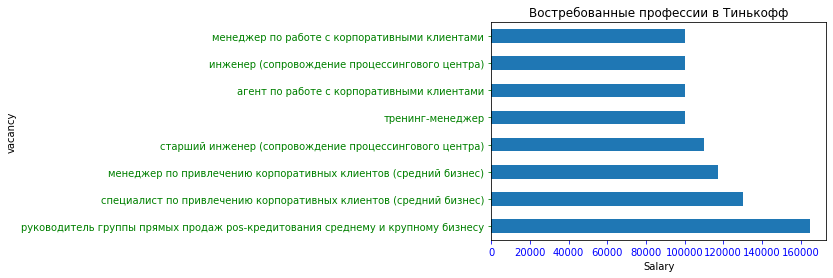

In [20]:
plt.title('Востребованные профессии в Тинькофф')

sortVac[sortVac>95000].plot.barh()

plt.xlabel('Salary')
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='green')
plt.show()